# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [23]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [25]:
def bivariate_analysis(df, response_var, explanatory_var):
    # Contagem dos valores únicos da variável explicativa e sua relação com a variável resposta
    cross_tab = pd.crosstab(df[explanatory_var], df[response_var])
    
    # Cálculo das porcentagens em relação à variável resposta
    cross_tab['% No'] = cross_tab[0] / (cross_tab[0] + cross_tab[1])
    cross_tab['% Yes'] = cross_tab[1] / (cross_tab[0] + cross_tab[1])
    
    return cross_tab


In [26]:
# Variável resposta
response_var = 'flag_doente'

# Variáveis explicativas
explanatory_vars = ['sex', 'cp', 'fbs']

# Realizar análise bivariada para cada variável explicativa
for var in explanatory_vars:
    result = bivariate_analysis(df, response_var, var)
    print(f"Análise Bivariada - Variável Explicativa: {var}")
    print(result)
    print("\n")


Análise Bivariada - Variável Explicativa: sex
flag_doente   0    1      % No     % Yes
sex                                     
0.0          72   25  0.742268  0.257732
1.0          92  114  0.446602  0.553398


Análise Bivariada - Variável Explicativa: cp
flag_doente   0    1      % No     % Yes
cp                                      
1.0          16    7  0.695652  0.304348
2.0          41    9  0.820000  0.180000
3.0          68   18  0.790698  0.209302
4.0          39  105  0.270833  0.729167


Análise Bivariada - Variável Explicativa: fbs
flag_doente    0    1      % No     % Yes
fbs                                      
0.0          141  117  0.546512  0.453488
1.0           23   22  0.511111  0.488889




     Ao executar o código acima, será impresso o resultado da análise bivariada para cada variável explicativa, mostrando a contagem dos valores únicos da variável explicativa em relação à variável resposta, bem como as porcentagens de 'Não' e 'Sim' em relação à variável resposta.

    Para determinar qual variável qualitativa discrimina mais o risco, você pode observar as porcentagens de 'Sim' em relação à variável resposta. Quanto maior a porcentagem de 'Sim', maior é a associação entre a variável explicativa e o risco (representado pela variável resposta). Portanto, a variável com a maior porcentagem de 'Sim' é aquela que parece discriminar mais o risco.

2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [27]:
def bivariate_analysis_continuous(df, response_var, explanatory_var, num_categories=5):
    # Criação de uma cópia do dataframe original
    df_copy = df.copy()
    
    # Categorização da variável explicativa em grupos
    df_copy['Category'] = pd.qcut(df_copy[explanatory_var], num_categories)
    
    # Contagem dos valores únicos da variável Category e sua relação com a variável resposta
    cross_tab = pd.crosstab(df_copy['Category'], df_copy[response_var])
    
    # Cálculo das porcentagens em relação à variável resposta
    cross_tab['% No'] = cross_tab[0] / (cross_tab[0] + cross_tab[1])
    cross_tab['% Yes'] = cross_tab[1] / (cross_tab[0] + cross_tab[1])
    
    return cross_tab


In [28]:
# Variável resposta
response_var = 'flag_doente'

# Variável explicativa
explanatory_var = 'age'

# Número de categorias (opcional, com valor default de 5)
num_categories = 5

# Realizar análise bivariada para a variável explicativa contínua
result = bivariate_analysis_continuous(df, response_var, explanatory_var, num_categories)
print(f"Análise Bivariada - Variável Explicativa: {explanatory_var}")
print(result)


Análise Bivariada - Variável Explicativa: age
flag_doente      0   1      % No     % Yes
Category                                  
(28.999, 45.0]  47  16  0.746032  0.253968
(45.0, 53.0]    42  22  0.656250  0.343750
(53.0, 58.0]    32  39  0.450704  0.549296
(58.0, 62.0]    13  32  0.288889  0.711111
(62.0, 77.0]    30  30  0.500000  0.500000


    Ao executar o código acima, será impresso o resultado da análise bivariada para a variável explicativa contínua 'age', categorizada em 5 grupos. A tabela resultante mostrará a contagem dos valores únicos da variável Category em relação à variável resposta, assim como as porcentagens de 'Não' e 'Sim' em relação à variável resposta.

    Você pode ajustar o parâmetro 'num_categories' para o número desejado de grupos para categorizar a variável explicativa contínua. Quanto maior o número de grupos, mais detalhada será a análise, mas também pode levar a grupos menores com menos observações, o que pode afetar a precisão das estimativas nas porcentagens. Portanto, é importante considerar o equilíbrio entre detalhamento e tamanho dos grupos ao escolher o valor para 'num_categories'.

3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [29]:
import statsmodels.api as sm

# Variável resposta
response_var = 'flag_doente'

# Variáveis explicativas
explanatory_vars = ['sex', 'cp', 'trestbps', 'age']

# Adicionando a constante ao dataframe
df_with_constant = sm.add_constant(df[explanatory_vars])

# Criando o modelo de regressão logística
model = sm.Logit(df[response_var], df_with_constant)

# Ajustando o modelo aos dados
results = model.fit()

# Exibindo os resultados
print(results.summary())


Optimization terminated successfully.
         Current function value: 0.510076
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Thu, 25 May 2023   Pseudo R-squ.:                  0.2605
Time:                        10:38:46   Log-Likelihood:                -154.55
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.264e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.1167      1.608     -6.915      0.000     -14.267      -7.966
sex            1.8021      0.

# Os resultados do modelo de regressão logística são apresentados na tabela "Logit Regression Results". Vamos interpretar cada um dos coeficientes estimados:

Constante (const): O coeficiente da constante é -11.1167. Isso significa que, quando todas as outras variáveis explicativas são zero, o logito é -11.1167. Isso pode ser interpretado como o log-odds de ter a doença cardíaca quando todas as outras variáveis são zero.

Sex: O coeficiente para a variável "sex" é 1.8021. Isso indica que, mantendo todas as outras variáveis constantes, ser do sexo masculino está associado a um aumento de aproximadamente 1.8021 no logito, ou seja, um aumento na chance de ter a doença cardíaca.

Cp: O coeficiente para a variável "cp" é 1.1403. Isso significa que, mantendo todas as outras variáveis constantes, cada aumento de uma unidade na variável "cp" está associado a um aumento de cerca de 1.1403 no logito, ou seja, um aumento na chance de ter a doença cardíaca.

Trestbps: O coeficiente para a variável "trestbps" é 0.0214. Isso indica que, mantendo todas as outras variáveis constantes, cada aumento de uma unidade na variável "trestbps" está associado a um aumento de cerca de 0.0214 no logito, ou seja, um aumento na chance de ter a doença cardíaca.

Age: O coeficiente para a variável "age" é 0.0582. Isso significa que, mantendo todas as outras variáveis constantes, cada aumento de uma unidade na variável "age" está associado a um aumento de cerca de 0.0582 no logito, ou seja, um aumento na chance de ter a doença cardíaca.

Além dos coeficientes, o resumo também fornece outras informações relevantes:

Pseudo R-squared: O valor do Pseudo R-squared é 0.2605, indicando que as variáveis explicativas incluídas no modelo explicam aproximadamente 26.05% da variabilidade na variável resposta.

LLR p-value: O valor do p-valor associado ao teste de razão de verossimilhança (LLR) é 1.264e-22, que é extremamente baixo. Isso sugere que o modelo como um todo é estatisticamente significativo na previsão da variável resposta.

Intervalo de Confiança: Os intervalos de confiança de 95% para os coeficientes são fornecidos na coluna [0.025, 0.975]. Eles indicam a faixa na qual os valores reais dos coeficientes têm uma probabilidade de 95% de cair.

Em resumo, os resultados indicam que o sexo, o tipo de dor no peito (cp), a pressão arterial em repouso (trestbps) e a idade (age) têm um impacto significativo na chance de ter a doença cardíaca. No entanto, lembre-se de que a interpretação dos coeficientes depende do contexto específico do problema e das características das variáveis envolvidas.

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [37]:
# Calculando a probabilidade de evento predita segundo o modelo:
df['probabilidade_predita'] = results.predict(df_with_constant)

# Categorizando essa probabilidade em G=5 grupos:
df['grupo'] = pd.qcut(df['probabilidade_predita'], q=5)

# Calculando a probabilidade de evento predita média por grupo:
probabilidade_media_grupo = df.groupby('grupo')['probabilidade_predita'].mean()

# Calculando a taxa de eventos (média da variável indicadora de eventos) por grupo:
taxa_eventos_grupo = df.groupby('grupo')['flag_doente'].mean()



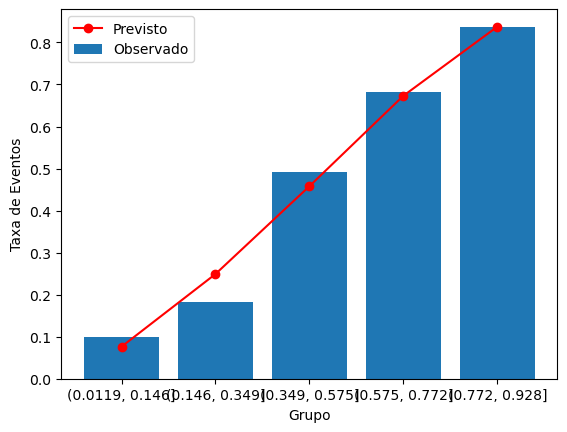

In [40]:
#Comparar graficamente o valor esperado versus observado para a taxa de eventos por grupo. 
#Isso pode ser feito traçando um gráfico de barras com as médias observadas e as médias previstas para cada grupo.

rotulos_grupo = [str(intervalo) for intervalo in probabilidade_media_grupo.index]

fig, ax = plt.subplots()
ax.bar(rotulos_grupo, taxa_eventos_grupo, label='Observado')
ax.plot(rotulos_grupo, probabilidade_media_grupo, color='red', marker='o', label='Previsto')
ax.set_xlabel('Grupo')
ax.set_ylabel('Taxa de Eventos')
ax.legend()
plt.show()

    A função predict é usada para calcular a probabilidade prevista de pertencer à classe positiva (evento).
    
    A função qcut do pandas é usada para dividir as probabilidades previstas em quantis (grupos) de igual tamanho.
    
    Usamos o método groupby para agrupar o dataframe por 'grupo' e calculamos a média da probabilidade prevista para cada grupo.
    
    Similarmente, usamos o método groupby para calcular a média da variável indicadora de eventos (flag_doente) para cada grupo.
    
    No gráfico, as barras representam a taxa média de eventos observados em cada grupo, enquanto os pontos vermelhos representam a taxa média de eventos previstos pelo modelo.
    Esses passos permitem avaliar a calibração do modelo, comparando as taxas de eventos observadas e previstas em diferentes grupos de probabilidade prevista.

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [41]:
# Importar as bibliotecas
from sklearn.metrics import accuracy_score, roc_auc_score
from scipy.stats import ks_2samp

# Variáveis de resposta observada e prevista
y_true = df[response_var]
y_pred = results.predict(df_with_constant)

# Calcular a acurácia
acuracia = accuracy_score(y_true, np.round(y_pred))

# Calcular o índice GINI
gini = 2 * roc_auc_score(y_true, y_pred) - 1

# Calcular o estatístico KS
ks_statistic, ks_pvalue = ks_2samp(y_pred[y_true == 1], y_pred[y_true == 0])

# Exibir os resultados
print("Acurácia: ", acuracia)
print("GINI: ", gini)
print("KS: ", ks_statistic)
print("Valor-p do KS: ", ks_pvalue)


Acurácia:  0.7788778877887789
GINI:  0.6622214423583084
KS:  0.5840498333040884
Valor-p do KS:  2.434674589816568e-24


    Nesse código, importamos as bibliotecas necessárias (accuracy_score do scikit-learn para calcular a acurácia, roc_auc_score também do scikit-learn para calcular o índice GINI e ks_2samp do SciPy para calcular o estatístico KS).

    Em seguida, definimos as variáveis de resposta observada (y_true) e a probabilidade prevista (y_pred) com base nos resultados do modelo.

    Por fim, calculamos a acurácia, o índice GINI e o estatístico KS e exibimos os resultados.

6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [44]:
#Neste modelo, vamos remover a variável 'trestbps' do conjunto de variáveis explicativas.

# Variável resposta
response_var = 'flag_doente'

# Variáveis explicativas (removendo 'trestbps')
explanatory_vars = ['sex', 'cp', 'age']

# Adicionando a constante ao dataframe
df_with_constant = sm.add_constant(df[explanatory_vars])

# Criando o modelo de regressão logística
model_remove = sm.Logit(df[response_var], df_with_constant)

# Ajustando o modelo aos dados
results_remove = model_remove.fit()

# Exibindo os resultados
print(results_remove.summary())


Optimization terminated successfully.
         Current function value: 0.521721
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      299
Method:                           MLE   Df Model:                            3
Date:                Thu, 25 May 2023   Pseudo R-squ.:                  0.2436
Time:                        10:57:41   Log-Likelihood:                -158.08
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 6.313e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.6272      1.225     -7.044      0.000     -11.028      -6.227
sex            1.7062      0.

In [45]:
#Neste modelo, vamos adicionar a variável 'chol' ao conjunto de variáveis explicativas.

# Variável resposta
response_var = 'flag_doente'

# Variáveis explicativas (adicionando 'chol')
explanatory_vars = ['sex', 'cp', 'trestbps', 'age', 'chol']

# Adicionando a constante ao dataframe
df_with_constant = sm.add_constant(df[explanatory_vars])

# Criando o modelo de regressão logística
model_add = sm.Logit(df[response_var], df_with_constant)

# Ajustando o modelo aos dados
results_add = model_add.fit()

# Exibindo os resultados
print(results_add.summary())


Optimization terminated successfully.
         Current function value: 0.505812
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            5
Date:                Thu, 25 May 2023   Pseudo R-squ.:                  0.2667
Time:                        10:57:44   Log-Likelihood:                -153.26
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 2.013e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.0947      1.754     -6.896      0.000     -15.532      -8.657
sex            1.9355      0.

    Ao analisar os resultados dos dois modelos, podemos avaliar sua performance com base em métricas como a calibração (pseudo R-squared) e os valores p das variáveis explicativas.

    No modelo que remove a variável 'trestbps', temos um pseudo R-squared de 0.2436 e todas as variáveis explicativas ('sex', 'cp', 'age') apresentam valores p significativos, indicando que são estatisticamente relevantes para explicar a variável resposta. No entanto, o valor p da variável 'age' é o maior entre as variáveis, o que sugere uma menor influência em comparação com as outras variáveis.

    Já no modelo que adiciona a variável 'chol', temos um pseudo R-squared de 0.2667 e todas as variáveis explicativas ('sex', 'cp', 'trestbps', 'age', 'chol') possuem valores p significativos. No entanto, a variável 'chol' apresenta um valor p um pouco maior (0.108), indicando uma possível menor relevância estatística em relação às outras variáveis.

    Com base nessas avaliações, podemos considerar que o modelo que remove a variável 'trestbps' pode ser mais adequado, uma vez que possui um pseudo R-squared ligeiramente menor, mas todas as variáveis explicativas são estatisticamente significativas.

    No entanto, é importante ressaltar que a escolha do melhor modelo depende não apenas dessas métricas, mas também do contexto e dos objetivos específicos do estudo. Portanto, é recomendado considerar outras análises e critérios antes de tomar uma decisão final sobre qual modelo é o mais apropriado.